# Sentiment Analysis
----

## Data Load

In [104]:
import pandas as pd

# corpus/economics.corpus
df_corpus = pd.read_pickle('corpus/economics.corpus')
titles = pd.read_csv('titles.csv')

titles['EventID']=titles['EventID'].apply(int)
df_corpus['EventID']=df_corpus['EventID'].apply(int)

df_corpus = pd.merge(df_corpus, titles, on='EventID')
df_corpus.sample(5)

,AvgTone,EventID,sentiment,text,url,Unnamed: 0,Title
451,-4.937723,710146641,-1,By Tom Allard and Fergus Jensen\n\nJAKARTA (Re...,1269 http://www.businessinsider.com/r-speak...,421,Speaker's arrest puts Indonesia parliament in ...
848,0.143472,608635336,0,As president and CEO of the World Resources In...,1659 http://www.eco-business.com/news/the-p...,808,‘The Paris Agreement is not enough’: 10 lesson...
566,-1.481481,677145872,-1,By Timothy Gardner and Nina Chestney\n\nWASHIN...,1401 http://markets.businessinsider.com/com...,550,"U.S. coal exports soar, in boost to Trump ener..."
612,-2.392822,658821054,-1,American food and beverage giant PepsiCo is un...,1461 http://www.eco-business.com/news/ngo-a...,610,"NGO and PepsiCo feud over deforestation, labou..."
910,0.112360,585339263,0,In a testament to the rising consumer potentia...,1735 http://www.businesstimes.com.sg/govern...,884,Jack Ma in Indonesia shows e-commerce growth p...


In [2]:
df_corpus.shape

(1207, 5)

## Data Preparation

In [106]:
from sklearn.model_selection import train_test_split

X = df_corpus.text
i = df_corpus.Title

X_train, X_test, i_train, i_test = train_test_split(X, i, test_size=0.02, random_state=42)

In [107]:
from nltk.stem.porter import PorterStemmer
import re
from nltk import word_tokenize         

porter_stemmer = PorterStemmer()

def custom_tokenizer(str_input):
    words = re.sub(r"[^a-z]|\b\w{0,3}\b", " ", str_input).lower().split()
#     words = [porter_stemmer.stem(word) for word in words]
    return words

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems
    
def get_similarity_matrix(content_as_str):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2,
                                       stop_words='english',use_idf=True,
                                       tokenizer=tokenize_and_stem, ngram_range=(1,3))
    tfidf_matrix = tfidf_vectorizer.fit_transform(content_as_str) #fit the vectorizer to synopses
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return (similarity_matrix, tfidf_matrix)


In [108]:
# ekstraksi fitur

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(["jakarta","jokowi",'said','says','just',
                                               "widodo","joko",'singapore','www','com'
                                               'indonesia','indonesians','bali','japan','korea',
                                               'indonesian','thailand','china', 'asia', 'asian',
                                               'vietnam','australian','australia', 'york','s','java','chinese',
                                               'india','malaysia','hong'])
my_stop_words = my_stop_words.union(["january","february","march",'april','may','june','july','august','september','october','november','december'])

my_stop_words = my_stop_words.union(["sunday","monday","tuesday",'thursday','wednesday','friday','year','years'
                                     'days','week','weeks','day','date','time'])


vectorizer = TfidfVectorizer(analyzer=u'word', tokenizer=custom_tokenizer, stop_words=my_stop_words, min_df=0.05, max_df=0.8, lowercase=True)
X = vectorizer.fit_transform(X_train)

X_train_dtm = vectorizer.transform(X_train)

In [109]:
pd.DataFrame(X_train_dtm.toarray(), columns=vectorizer.get_feature_names())

,able,access,according,account,accused,achieve,action,actions,activists,activities,...,women,work,worked,workers,working,world,worst,worth,writing,years
0,0.000000,0.000000,0.020262,0.000000,0.000000,0.000000,0.032316,0.000000,0.000000,0.000000,...,0.000000,0.366064,0.000000,0.072790,0.000000,0.000000,0.000000,0.000000,0.000000,0.018692
1,0.000000,0.000000,0.114398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.072633,0.000000,0.000000,0.000000,0.000000,0.065795,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.138504,0.000000,0.000000,0.000000,0.000000,0.000000,0.124912,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089044,...,0.000000,0.000000,0.000000,0.000000,0.070128,0.085825,0.000000,0.000000,0.000000,0.000000
4,0.025886,0.000000,0.000000,0.000000,0.000000,0.033779,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.042201,0.000000,0.031468,0.123496,0.045342,0.000000,0.000000,0.000000,0.032322
5,0.020085,0.000000,0.013593,0.023420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.032744,0.000000,0.048832,0.000000,0.070363,0.000000,0.000000,0.000000,0.050158
6,0.000000,0.000000,0.030022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.077700,0.000000,0.000000,0.000000,0.110777
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.099171,0.250832,0.000000,0.187037,0.146808,0.000000,0.000000,0.000000,0.000000,0.096058
8,0.036786,0.000000,0.099586,0.000000,0.046687,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044420,0.086584,0.000000
9,0.000000,0.000000,0.022384,0.038566,0.000000,0.000000,0.000000,0.042636,0.000000,0.080142,...,0.000000,0.026960,0.043159,0.000000,0.031558,0.019311,0.040622,0.039937,0.000000,0.000000


# K-Means Clustering 
----

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

true_k = 8

model = KMeans(n_clusters=true_k, init='k-means++', random_state=0, max_iter=100, n_init=2)
model.fit(X_train_dtm)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    
    t = []
    for ind in order_centroids[i, :40]:
        t.append(terms[ind])
    
    print("Cluster %d:" % i, ','.join(t),'\n')


Top terms per cluster:
Cluster 0: police,islamic,attack,attacks,state,killed,people,arrested,security,group,authorities,muslim,reuters,foreign,spokesman,papua,majority,capital,country,forces,island,family,city,told,reporting,including,media,world,east,claimed,editing,linked,years,recent,area,chief,southeast,writing,government,officials 

Cluster 1: coal,energy,power,mining,plant,plants,project,government,cent,resources,climate,emissions,company,ministry,country,capacity,development,demand,water,million,production,companies,sector,environmental,local,pollution,agreement,countries,global,philippines,greenpeace,world,fuel,change,industry,minister,projects,owned,prices,east 

Cluster 2: market,company,business,million,cent,global,group,billion,industry,companies,growth,markets,report,share,products,services,financial,world,demand,sales,technology,development,firm,including,years,research,investment,based,investors,digital,information,mobile,countries,platform,data,online,bank,exchange,regi

In [113]:
X_test_dtm = vectorizer.transform(X_test)
prediction = model.predict(X_test_dtm)

result = pd.DataFrame(i_test)
result['cluster'] = prediction
result.to_csv('clustering-result.csv')

In [114]:
#set up cluster names using a dict

cluster_names = {0: 'National Security', 
                 1: 'Energy and Mining', 
                 2: 'Industry', 
                 3: 'Environment', 
                 4: 'Climate Change', 
                 5: 'Social Life',
                 6: 'Trade',
                 7: 'Financial'}


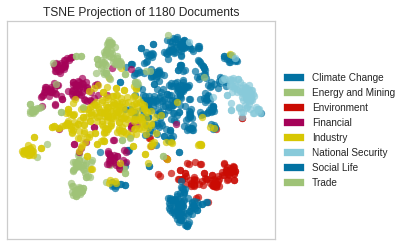

In [115]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(X_train_dtm, ["{}".format(cluster_names[c]) for c in model.labels_])
tsne.poof()

### Evaluation

In [56]:
from scipy.spatial.distance import pdist, euclidean
import numpy as np

def DaviesBouldin(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]
    variances = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    db = []

    for i in range(n_cluster):
        for j in range(n_cluster):
            if j != i:
                db.append((variances[i] + variances[j]) / euclidean(centroids[i], centroids[j]))

    return(np.max(db) / n_cluster)

In [57]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

labels = model.labels_
dbi_score = DaviesBouldin(X_train_dtm.toarray(), labels)  
print("DBI Score", dbi_score)

DBI Score 0.6762542290761472


## Find optimal Clusters

In [64]:
for i in range(2,12):
    kmeans = KMeans(n_clusters=i, n_init=2, init='k-means++', random_state=0, max_iter=100)
    kmeans.fit(X_train_dtm)
    labels = kmeans.labels_
    dbi_score = DaviesBouldin(X_train_dtm.toarray(), labels)  
    print("DBI Score for n=",i,' :', dbi_score)
        
    sil_score = silhouette_score(X_train_dtm.toarray(), labels)  
    print("Sil Score", sil_score, "\n")

DBI Score for n= 2  : 2.119250795872055
Sil Score 0.019226980922520974 

DBI Score for n= 3  : 2.3088212865765256
Sil Score 0.026013813612617592 

DBI Score for n= 4  : 1.7268703168057398
Sil Score 0.027628905429789238 

DBI Score for n= 5  : 1.3916325769639208
Sil Score 0.02594607925582557 

DBI Score for n= 6  : 1.107631727544044
Sil Score 0.028867323526001593 

DBI Score for n= 7  : 1.1011387980448706
Sil Score 0.030051666315683474 

DBI Score for n= 8  : 0.6762542290761472
Sil Score 0.03329552691333254 

DBI Score for n= 9  : 0.7341767239453901
Sil Score 0.03557681780963757 

DBI Score for n= 10  : 0.7302680943703824
Sil Score 0.03712854013624732 

DBI Score for n= 11  : 0.6129998126305455
Sil Score 0.037991923746718566 



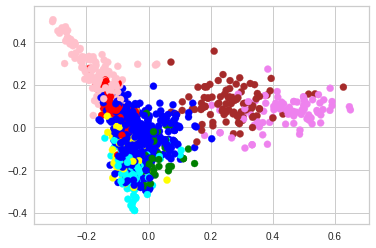

In [58]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pca.fit_transform(X_train_dtm.toarray())

colors = ['red','green','blue','yellow','pink','brown','aqua','violet','orange']


result = pd.DataFrame(transformed)
result['cluster'] = labels
result['color'] = list(map(lambda x: colors[x], labels))

plt.scatter(result[0], result[1], c=result['color'])
# plt.legend()
plt.show()

# MiniBatchKMeans Clustering 
----

In [130]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
   
n = 9
kmeans = MiniBatchKMeans(n_clusters=n, init_size = 3*n,
        random_state=0, 
        batch_size=50)
kmeans.fit(X_train_dtm)

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(n):    
    t = []
    for ind in order_centroids[i, :60]:
        t.append(terms[ind])
    
    print("Cluster %d:" % i, ','.join(t),'\n')

Cluster 0: market,report,analysis,forecast,research,demand,global,industry,growth,competitive,offering,landscape,markets,regional,information,future,period,wire,opportunities,expected,challenges,capacity,commercial,production,shares,sector,visit,share,increasing,potential,rising,supply,provides,business,export,power,size,companies,recent,prices,major,population,growing,addition,natural,company,data,sales,including,years,increase,europe,region,value,number,reports,country,energy,increased,countries 

Cluster 1: palm,forest,peat,fires,land,deforestation,companies,plantations,company,forests,peatland,sustainability,areas,sustainable,haze,hectares,plantation,environmental,ministry,government,supply,carbon,sumatra,conservation,environment,million,industry,concessions,mongabay,kalimantan,group,cent,greenpeace,peatlands,production,area,paper,story,policy,forestry,report,world,clearing,development,agency,ngos,climate,burning,years,published,papua,practices,province,clear,local,emissions,commun

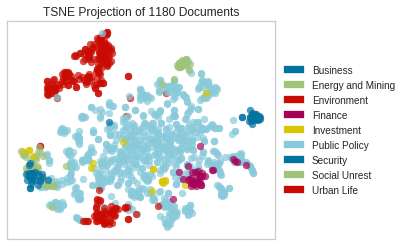

In [132]:
from yellowbrick.text import TSNEVisualizer

#set up cluster names using a dict

cluster_names2 = {0: 'Business', 
                 1: 'Environment', 
                 2: 'Investment', 
                 3: 'Energy and Mining', 
                 4: 'Public Policy', 
                 5: 'Social Unrest',
                 6: 'Security',
                 7: 'Urban Life',
                 8: 'Finance'}


tsne = TSNEVisualizer()
tsne.fit(X_train_dtm, ["{}".format(cluster_names2[c]) for c in kmeans.labels_])
tsne.poof()

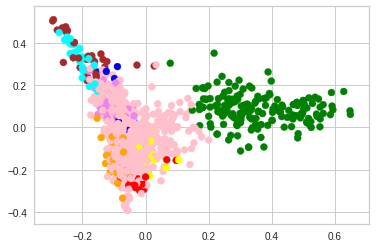

In [133]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pca.fit_transform(X_train_dtm.toarray())

colors = ['red','green','blue','yellow','pink','brown','aqua','violet','orange']


result = pd.DataFrame(transformed)
result['cluster'] = kmeans.labels_
result['color'] = list(map(lambda x: colors[x], kmeans.labels_))

plt.scatter(result[0], result[1], c=result['color'])
# plt.legend()
plt.show()

### Evaluation

In [122]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
dbi_score = DaviesBouldin(X_train_dtm.toarray(), labels)  
print("DBI Score", dbi_score)

sil_score = silhouette_score(X_train_dtm.toarray(), labels)  
print("Sil Score", sil_score)

DBI Score 0.48119420043365224
Sil Score 0.01806597575670138


## Find optimal Clusters

In [125]:
for i in range(2,12):
    kmeans = MiniBatchKMeans(n_clusters=i, init_size = i*3,
        random_state=0, 
        batch_size=50)
    kmeans.fit(X_train_dtm)
    labels = kmeans.labels_
    dbi_score = DaviesBouldin(X_train_dtm.toarray(), labels)  
    print("DBI Score for n=",i,' :', dbi_score)
    
#     sil_score = silhouette_score(X_train_dtm.toarray(), labels)  
#     print("Sil Score", sil_score, "\n")
    

DBI Score for n= 2  : 3.7464596172934326
DBI Score for n= 3  : 0.3395519539225371
DBI Score for n= 4  : 1.0654985099399743
DBI Score for n= 5  : 0.8423830092723786
DBI Score for n= 6  : 1.2224201836105255
DBI Score for n= 7  : 1.0153325548415597
DBI Score for n= 8  : 0.8014435878729289
DBI Score for n= 9  : 0.48119420043365224
DBI Score for n= 10  : 0.5865383155568908
DBI Score for n= 11  : 0.4423817656434654


In [70]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)
dbscan.fit(X_train_dtm)

# order_centroids = dbscan.cluster_centers_.argsort()[:, ::-1]

dbscan.labels_
# for i in range(n):    
#     t = []
#     for ind in order_centroids[i, :40]:
#         t.append(terms[ind])
    
#     print("Cluster %d:" % i, ','.join(t),'\n')

array([-1, -1, -1, ..., -1, -1, -1])